### Question 2

#### The Physician Compare datasets provide information about clinicians and facilities that are enrolled in Medicare. Please dowload all four flat, csv files. You may also find the "Downloadable Database Dictionary" under the "Get supporting documents" dropdown menu helpful when answering these questions.

In [224]:
#import in-built python libraries 
import csv
import pandas as pd #for dataframes
import statistics
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [5]:
# loading the csv as dataframe
patient_exp_data=pd.read_csv('Physician_Compare/Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv')
patient_exp_data.head()

,Organization legal name or 'doing business as' name,Group PAC ID,State,Measure Identifier,Measure Title,Measure Performance Rate,Footnote
0,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_1,"Getting timely care, appointments, and informa...",63.0,NaN
1,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_10,Between visit communication.,49.0,NaN
2,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_12,Attention to patient medication cost.,27.0,NaN
3,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_2,How well clinicians communicate.,86.0,NaN
4,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_3,Patients' rating of clinicians.,83.0,NaN


In [6]:
# loading the csv as dataframe
grp_performance_scores=pd.read_csv('Physician_Compare/Physician_Compare_2015_Group_Public_Reporting_Performance_Scores.csv')
grp_performance_scores.head()

,Organization legal name or 'doing business as' name,Group PAC ID,State,Participating in PQRS,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Footnote,Reporting Mechanism,Reported on PC Live Site
0,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_131_1,Pain Assessment and Follow-Up,N,99.0,NaN,REG,Y
1,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_154_1,Falls: Risk Assessment,N,77.0,NaN,REG,Y
2,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_155_1,Falls: Plan of Care,N,88.0,NaN,REG,Y
3,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_182_1,Functional Outcome Assessment,N,100.0,NaN,REG,Y
4,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_110_1,Preventive Care and Screening: Influenza Immun...,N,62.0,NaN,WI,Y


In [112]:
# loading the csv as dataframe
indv_performance_scores=pd.read_csv('Physician_Compare/Physician_Compare_2015_Individual_EP_Public_Reporting___Performance_Scores.csv')
indv_performance_scores.head()

,NPI,PAC ID,Last Name,First Name,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,21,CLM,Y
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,28,CLM,Y
2,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_112_1,Breast Cancer Screening,N,37,CLM,Y
3,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,N,22,CLM,Y
4,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_128_1,Preventive Care and Screening: Body Mass Index...,N,42,CLM,Y


In [40]:
# loading the csv as dataframe
phy_comp=pd.read_csv('Physician_Compare/Physician_Compare_National_Downloadable_File.csv')
phy_comp.head()

/Users/shrutimehta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (15,25,26,27,28,29,30,31,32,33,34,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,1487927612,4880850486,I20120726000331,HALL,ESTHER,S,NaN,F,NaN,LIFE CHIROPRACTIC COLLEGE - WEST,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
1,1235146762,2365435336,I20040406000367,WHITE,BARBARA,L,NaN,F,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
2,1346282258,5395768527,I20060113000139,DAVIDSON,JOHN,A,NaN,M,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
3,1932283124,5193762862,I20050415000143,CAGEN,STEVEN,F,NaN,M,DC,SHERMAN COLLEGE OF STRAIGHT CHIROPRACTIC,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
4,1902950462,7416123666,I20120110000522,ESPY,LEISHA,H,NaN,F,NaN,LIFE CHIROPRACTIC COLLEGE,...,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN


In [41]:
phy_comp.count()

NPI                                                                  2955262
PAC ID                                                               2955262
Professional Enrollment ID                                           2955262
Last Name                                                            2955209
First Name                                                           2955235
Middle Name                                                          2230473
Suffix                                                                 58266
Gender                                                               2955262
Credential                                                           1013606
Medical school name                                                  2955240
Graduation year                                                      2947474
Primary specialty                                                    2955261
Secondary specialty 1                                                 414765

In [42]:
# null values in each column/feature
phy_comp.isnull().sum(axis=0)

NPI                                                                        0
PAC ID                                                                     0
Professional Enrollment ID                                                 0
Last Name                                                                 53
First Name                                                                27
Middle Name                                                           724789
Suffix                                                               2896996
Gender                                                                     0
Credential                                                           1941656
Medical school name                                                       22
Graduation year                                                         7788
Primary specialty                                                          1
Secondary specialty 1                                                2540497

### Question 1:  How many clinicians are in the dataset? Each clinician has a unique NPI and PAC ID. However, there may be errors in the data. For this question, you will need to determine whether to identify clinicians using their NPI or PAC ID (or both).

##### Assumption:  First of all, if we are assuming that NPI is  determining one value of PAC ID and vice versa which clarifies the idea that we NPI and PAC ID combination can be used as a combination.

###### Also we are assuming that PAC ID with digits less than 10 is not an error. So in this case it makes it stronger that both PAC ID and NPI can be used together

In [200]:
count=new_data_perf.groupby(by=['NPI','PAC ID'], as_index=False).count()
count.head()

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name
0,1003000126,7517003643,4,4,4,0
1,1003000134,4284706367,10,10,10,10
2,1003000142,9931380672,8,8,8,0
3,1003000407,2769663509,1,1,1,1
4,1003000423,9133397268,2,2,2,2


In [33]:
a.loc[a['NPI'] == 1003000126] #randomly checking data

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name
0,1003000126,7517003643,4,4,4,0


In [35]:
new_data_perf.loc[new_data_perf['NPI'] == 1003000126] #checking the records for the grouped values

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name
788246,1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,NaN
1370324,1003000126,7517003643,I20130530000085,ENKESHAFI,ARDALAN,NaN
1453244,1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,NaN
1854373,1003000126,7517003643,I20130530000085,ENKESHAFI,ARDALAN,NaN


In [201]:
new_data_perf.head()

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name
0,1487927612,4880850486,I20120726000331,HALL,ESTHER,S
1,1235146762,2365435336,I20040406000367,WHITE,BARBARA,L
2,1346282258,5395768527,I20060113000139,DAVIDSON,JOHN,A
3,1932283124,5193762862,I20050415000143,CAGEN,STEVEN,F
4,1902950462,7416123666,I20120110000522,ESPY,LEISHA,H


In [204]:
data=phy_comp.groupby(by=['PAC ID','NPI'],as_index=False).count()
data.head()

,PAC ID,NPI,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,42100026,1871519561,3,3,3,3,0,3,0,3,...,3,3,3,3,3,3,3,3,0,0
1,42100042,1790868909,2,2,2,0,0,2,0,2,...,0,0,0,0,0,0,2,0,0,0
2,42100059,1043326754,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
3,42100117,1508823618,7,7,7,0,0,7,7,7,...,7,7,0,0,0,0,7,7,7,0
4,42100158,1174505499,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,2,0,0,0


In [205]:
data.count().head()

PAC ID                        1070399
NPI                           1070399
Professional Enrollment ID    1070399
Last Name                     1070399
First Name                    1070399
dtype: int64

#### Conclusion: count of clinicians is 1070399

### Question2:  What is the ratio of male to female clinicians?

Methodology: In this method we are first grouping the dataset 'Physician_Compare_National_Downloadable_File.csv' as Gender and further filtering Gender by Male and grouping by 'NPI' and 'PAC ID' impying the number of males.We can get the ratio of total male to females by values.

In [207]:
data_gender=data.groupby(by=['Gender'],as_index=False).sum()
data_gender.head()

,Gender,PAC ID,NPI,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,1,1809720152977512,543420046003376,362197,362192,362192,271165,6998,106991,362190,...,47847,47633,25584,25465,14222,14136,362197,197504,56415,1929
1,2,1772290578646651,531834024997206,709116,709102,709110,530252,13448,223238,709110,...,123328,122756,67874,67486,38218,37946,709116,392630,133322,5854
2,3,588575949150105,176255008387357,352893,352884,352884,263064,7011,115587,352884,...,85152,84813,48207,47910,28386,28200,352893,251613,81672,3090
3,4,455329684380413,136408686510579,364008,364000,364008,272544,6960,121876,364008,...,97688,97228,56212,55900,33128,32932,364008,264564,96888,3712
4,5,215789392622441,64840755139274,215815,215805,215815,162745,4385,74155,215815,...,68605,68335,40735,40540,24925,24785,215815,174140,62805,2045


In [76]:
male=phy_comp[phy_comp['Gender']=='M'] #filtering by Male
male  # 1674452

data_male=male.groupby(by=['PAC ID','NPI'],as_index=False).count() #group by IDs
data_male #578092

cred_male=male.groupby(by=['Credential'],as_index=False).count() #group by Credential
cred_male 

,Credential,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,AA,275,275,275,275,275,227,22,275,275,...,40,40,4,4,4,4,275,205,2,0
1,AU,569,569,569,569,569,504,36,569,569,...,4,4,2,2,2,2,569,254,0,0
2,CNA,13007,13007,13007,13007,13007,11464,636,13007,13007,...,1731,1731,577,577,252,252,13007,9218,0,1
3,CNM,12,12,12,12,12,12,0,12,12,...,0,0,0,0,0,0,12,7,0,0
4,CNS,142,142,142,142,142,115,3,142,142,...,9,9,7,7,1,1,142,68,0,0
5,CP,6281,6281,6281,6281,6281,5448,201,6281,6281,...,24,23,3,3,2,2,6281,1642,3,1
6,CSW,3396,3396,3396,3396,3396,2835,119,3396,3395,...,0,0,0,0,0,0,3396,552,0,0
7,DC,17291,17291,17291,17290,17291,15445,685,17291,17291,...,97,97,49,49,31,31,17291,4623,2126,2
8,DDM,363,363,363,363,363,306,15,363,363,...,17,17,3,3,0,0,363,36,18,0
9,DDS,990,990,990,990,990,858,54,990,990,...,55,55,14,14,11,11,990,253,80,3


In [221]:
female=phy_comp[phy_comp['Gender']=='F'] #filtering by Female
female  # 1280809

data_female=female.groupby(by=['PAC ID','NPI'],as_index=False).count() #group by IDs
data_female #492306

cred_female=female.groupby(by=['Credential'],as_index=False).count() 
cred_female.head()

,Credential,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,AA,248,248,248,248,248,200,0,248,248,...,13,13,8,8,4,4,248,199,0,0
1,AU,1907,1907,1907,1907,1907,1622,0,1907,1907,...,4,4,0,0,0,0,1907,1125,0,0
2,CNA,15484,15484,15484,15484,15484,12812,0,15484,15484,...,1467,1459,477,477,116,116,15484,11463,0,0
3,CNM,2202,2202,2202,2202,2202,1841,0,2202,2202,...,24,24,7,7,4,4,2202,1614,0,13
4,CNS,2074,2074,2074,2074,2074,1742,2,2074,2074,...,115,115,45,45,18,18,2074,1038,6,28


#### Ratio: Male: Female=578092:492306 =1.1742534115

### Question 3: What is the highest ratio of female clinicians to male clinicians with a given type of credential?

Methodology: In this method we are first grouping the dataset 'Physician_Compare_National_Downloadable_File.csv' as Gender and further filtering Gender by Male and grouping by 'NPI' and 'PAC ID' impying the number of males.We can get the ratio of total male to females by values.Further grouping the credential of males and females respectively. Ratio can be calculated by dividing the females number by males number.

In [210]:
cred_female=cred_female[['Credential','Gender']]
cred_female

,Credential,Gender
0,AA,248
1,AU,1907
2,CNA,15484
3,CNM,2202
4,CNS,2074
5,CP,7218
6,CSW,11884
7,DC,4798
8,DDM,66
9,DDS,68


In [89]:
cred_male=cred_male[['Credential','Gender']]
cred_male

,Credential,Gender
0,AA,275
1,AU,569
2,CNA,13007
3,CNM,12
4,CNS,142
5,CP,6281
6,CSW,3396
7,DC,17291
8,DDM,363
9,DDS,990


In [213]:
ratio=cred_female['Gender']/cred_male['Gender']
ratio 

0       0.901818
1       3.351494
2       1.190436
3     183.500000
4      14.605634
5       1.149180
6       3.499411
7       0.277485
8       0.181818
9       0.068687
10      0.339974
11      0.244366
12      0.328740
13     32.239130
14      9.413236
15      0.576287
16      4.555076
17      1.458046
18      0.991803
19      0.891625
20           NaN
Name: Gender, dtype: float64

##### highest ratio is 183.500000 of the credential 'CNM'

### Question 4 How many states have fewer than 10 healthcare facilities in this dataset? Include Washington D.C. and and U.S.territories in this calculation.

Methodology: In this question, we will groupby group performance scores by State, and count the health facilities less than 2

In [135]:
grp_perf=grp_performance_scores.groupby(by="State",as_index=False).count()
grp_perf.head()

,State,Organization legal name or 'doing business as' name,Group PAC ID,Participating in PQRS,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Footnote,Reporting Mechanism,Reported on PC Live Site
0,AK,39,39,39,39,39,39,36,3,39,39
1,AL,167,167,146,167,167,167,166,1,167,167
2,AR,96,96,91,96,96,96,96,0,96,96
3,AZ,187,187,175,187,187,187,183,4,187,187
4,CA,647,647,601,647,647,647,630,17,647,647


In [108]:
grp_perf["Organization legal name or 'doing business as' name"] < 10

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39     True
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: Organization legal name or 'doing business as' name, dtype: bool

#### 2 states have fewer than 10 healthcare facilities 

### Question 5: All measure performance rates are on a 0 to 100 scale. Compute the average measure performance rate for each clinician (across all measures). Consider the distribution of these average rates for individuals who have at least 10. What is the standard deviation of that distribution?

Methodology: In this question, the performance scores are grouped by PAC ID, NPI, First Name and Last Name and then calculate Measure performance rate greater than 10. Further calculating the standard deviation of the dataset.

In [223]:
indv_performance_scores.head()

,NPI,PAC ID,Last Name,First Name,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,21,CLM,Y
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,28,CLM,Y
2,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_112_1,Breast Cancer Screening,N,37,CLM,Y
3,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,N,22,CLM,Y
4,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_128_1,Preventive Care and Screening: Body Mass Index...,N,42,CLM,Y


In [140]:
pac_npi_perfscores=indv_performance_scores.groupby(by=['PAC ID','NPI'],as_index=False).mean()
pac_npi_perfscores.head()

,PAC ID,NPI,Measure Performance Rate
0,42100117,1508823618,42.222222
1,42100133,1477528776,68.500000
2,42100190,1154338044,96.000000
3,42100273,1982641247,1.000000
4,42100323,1285691733,73.833333


In [121]:
perf_data=indv_performance_scores.groupby(by=['PAC ID','NPI','First Name', 'Last Name'],as_index=False).mean()
perf_data

,PAC ID,NPI,First Name,Last Name,Measure Performance Rate
0,42100117,1508823618,DAVID,GRIFFIN,42.222222
1,42100133,1477528776,JEFFREY,SPEAR,68.500000
2,42100190,1154338044,JOHN,VERBRUGGE,96.000000
3,42100273,1982641247,SAJI,JOHN,1.000000
4,42100323,1285691733,DRUANNE,LAPLANTE,73.833333
5,42100547,1033197512,TEODULO,REMANDABAN,100.000000
6,42100687,1447242219,ANTHONY,PINTO,100.000000
7,42100968,1922007376,RICHARD,PREBISH,100.000000
8,42101156,1881799146,MANOJ,NATH,100.000000
9,42101164,1033183900,DANIEL,HEARLD,78.000000


In [133]:
final=perf_data[perf_data['Measure Performance Rate']>=10]
statistics.stdev(final['Measure Performance Rate'])

22.51016132174936

### Question 6 What is the p-value of the linear regression of performance rates vs. graduation year? Consider the average performance rates (across all measures) of every doctor (MD) who graduated between 1973 and 2003 (inclusive). Only consider doctors who have at least 10 rates. For each graduation year, compute the mean of these rates. Assuming the relationship between graduation year and performance rates is linear, find the slope and determine if the relationship is significant. Return the p-value of the linear regression.


Methodology: In this question,we have merged the dataset Physical Compare and Individual Performance,
further filtered the data using the credential 'MD',and graduation year between 
Graduation year between 1973.0 & 2003.0 and Measure Performance Rate >=10 and grouping by graduation year and check
if the model is linear is no and calculating the p-value.

In [220]:
merged_final=phy_comp.merge(indv_performance_scores,on=['PAC ID','NPI'])
merged_final.head()

,NPI,PAC ID,Professional Enrollment ID,Last Name_x,First Name_x,Middle Name,Suffix,Gender,Credential,Medical school name,...,Used electronic health records,Committed to heart health through the Million Hearts® initiative.,Last Name_y,First Name_y,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site
0,1932264462,446211601,I20120127000819,GESIK,BRIAN,K,NaN,M,NaN,OTHER,...,NaN,NaN,GESIK,BRIAN,PQRS_EP_131_1,Pain Assessment and Follow-Up,N,100,CLM,Y
1,1013912195,7517083702,I20100924000784,BOLEN,TROY,C,NaN,M,NaN,NORTHWESTERN COLLEGE OF CHIROPRACTIC,...,NaN,NaN,BOLEN,TROY,PQRS_EP_131_1,Pain Assessment and Follow-Up,N,100,CLM,Y
2,1013912195,7517083702,I20100924000784,BOLEN,TROY,C,NaN,M,NaN,NORTHWESTERN COLLEGE OF CHIROPRACTIC,...,NaN,NaN,BOLEN,TROY,PQRS_EP_182_1,Functional Outcome Assessment,N,100,CLM,Y
3,1003958174,3971561465,I20041230000258,KAVANAUGH,MATTHEW,M,NaN,M,PT,OTHER,...,NaN,NaN,KAVANAUGH,MATTHEW,PQRS_EP_182_1,Functional Outcome Assessment,N,100,CLM,Y
4,1003958174,3971561465,I20041230000258,KAVANAUGH,MATTHEW,M,NaN,M,PT,OTHER,...,NaN,NaN,KAVANAUGH,MATTHEW,PQRS_EP_182_1,Functional Outcome Assessment,N,100,CLM,Y


In [219]:
cred=merged_final[merged_final['Credential']=='MD'] #combining the two datasets
cred.head()

,NPI,PAC ID,Professional Enrollment ID,Last Name_x,First Name_x,Middle Name,Suffix,Gender,Credential,Medical school name,...,Used electronic health records,Committed to heart health through the Million Hearts® initiative.,Last Name_y,First Name_y,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site
60,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_137_1,Melanoma: Continuity of Care – Recall System,N,100,REG,Y
61,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_194_1,Oncology: Cancer Stage Documented,N,95,REG,Y
62,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_238_1,Use of High-Risk Medications in the Elderly*,Y,0,REG,N
63,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_137_1,Melanoma: Continuity of Care – Recall System,N,100,REG,Y
64,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_194_1,Oncology: Cancer Stage Documented,N,95,REG,Y


In [215]:
grad_year=cred[(cred['Graduation year']>=1973.0) & (cred['Graduation year']<=2003.0)] #filtering based on the year
grad_year.head()

,NPI,PAC ID,Professional Enrollment ID,Last Name_x,First Name_x,Middle Name,Suffix,Gender,Credential,Medical school name,...,Used electronic health records,Committed to heart health through the Million Hearts® initiative.,Last Name_y,First Name_y,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site
60,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_137_1,Melanoma: Continuity of Care – Recall System,N,100,REG,Y
61,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_194_1,Oncology: Cancer Stage Documented,N,95,REG,Y
62,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_238_1,Use of High-Risk Medications in the Elderly*,Y,0,REG,N
63,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_137_1,Melanoma: Continuity of Care – Recall System,N,100,REG,Y
64,1366412033,6204830136,I20060908000071,SMITH,REBECCA,L,NaN,F,MD,BAYLOR COLLEGE OF MEDICINE,...,NaN,NaN,SMITH,REBECCA,PQRS_EP_194_1,Oncology: Cancer Stage Documented,N,95,REG,Y


In [164]:
rates=grad_year.groupby(by=['PAC ID','NPI','First Name_x', 'Last Name_x'],as_index=False).mean()
rates.head()

,PAC ID,NPI,First Name_x,Last Name_x,Graduation year,Group Practice PAC ID,Number of Group Practice members,Hospital affiliation CCN 5,Measure Performance Rate
0,42100117,1508823618,DAVID,GRIFFIN,1996.0,5.943454e+09,305.142857,NaN,42.222222
1,42100273,1982641247,SAJI,JOHN,1996.0,4.385536e+09,909.000000,NaN,1.000000
2,42101156,1881799146,MANOJ,NATH,1988.0,5.799777e+09,2.000000,NaN,100.000000
3,42101164,1033183900,DANIEL,HEARLD,1996.0,8.068068e+09,40.000000,NaN,78.000000
4,42101446,1700869112,RAGHU,KANUMURI,1992.0,5.915542e+09,78.000000,NaN,37.000000


In [216]:
rate_ten=rates[rates['Measure Performance Rate']>=10] # filtering based on the measure performance rate greater than 10
rate_ten.head()

,PAC ID,NPI,First Name_x,Last Name_x,Graduation year,Group Practice PAC ID,Number of Group Practice members,Hospital affiliation CCN 5,Measure Performance Rate
0,42100117,1508823618,DAVID,GRIFFIN,1996.0,5.943454e+09,305.142857,NaN,42.222222
2,42101156,1881799146,MANOJ,NATH,1988.0,5.799777e+09,2.000000,NaN,100.000000
3,42101164,1033183900,DANIEL,HEARLD,1996.0,8.068068e+09,40.000000,NaN,78.000000
4,42101446,1700869112,RAGHU,KANUMURI,1992.0,5.915542e+09,78.000000,NaN,37.000000
5,42101651,1396828901,FRANCIS,CYRAN,1998.0,2.062312e+09,39.000000,NaN,100.000000


In [217]:
grad_avg=rate_ten.groupby(by='Graduation year',as_index=False).mean() # grouping by graduation year
grad_avg.head()

,Graduation year,PAC ID,NPI,Group Practice PAC ID,Number of Group Practice members,Hospital affiliation CCN 5,Measure Performance Rate
0,1973.0,5.105326e+09,1.493185e+09,5.013421e+09,198.657963,205810.375000,78.341077
1,1974.0,4.930427e+09,1.505617e+09,4.866997e+09,189.141836,300113.230769,78.314540
2,1975.0,4.921099e+09,1.493650e+09,4.939365e+09,190.652305,284051.515789,75.032327
3,1976.0,4.994242e+09,1.498776e+09,5.015180e+09,219.800635,278889.852941,78.169666
4,1977.0,4.924790e+09,1.507795e+09,4.951422e+09,190.092284,263573.066667,78.612541


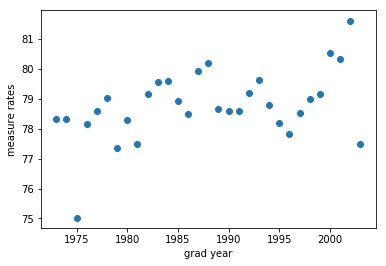

In [175]:
X=grad_avg['Graduation year'] 
y=grad_avg['Measure Performance Rate'] 
plt.scatter(X,y)
plt.ylabel('measure rates') 
plt.xlabel('grad year') 
plt.show()

In [178]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [179]:
p_value

0.011703173418825239

In [180]:
slope

0.057847788590182733

### Question 7: What is the absolute difference in the average performance rates between doctors (MD) and nurse practitioners (NP)? For each clinician, use his or her average performance rates across all measures. Furthermore, only consider individuals who have at least 10 rates.

Methodology: In this question, we have to filter, Credential 'MD' and 'NP' and calculating the Measure Performance Rate more than equal 10. Then calculate the absolute difference in the average performance rates between doctors (MD) and nurse practitioners (NP)

In [196]:
cred_MD=merged_final[merged_final['Credential']=='MD']
cred_MD.head()

perf_avg=cred_MD.groupby(by=['NPI','PAC ID'],as_index=False).mean()
perf_avg=perf_avg[perf_avg['Measure Performance Rate']>=10]
perf_avg.head()

,NPI,PAC ID,Graduation year,Group Practice PAC ID,Number of Group Practice members,Hospital affiliation CCN 5,Measure Performance Rate
0,1003003856,6305813148,1997.0,1.850361e+09,NaN,NaN,15.000000
1,1003010349,1557388584,2003.0,3.308171e+09,3.000000,NaN,40.555556
2,1003015553,9133117898,1987.0,9.931013e+09,171.000000,NaN,98.666667
3,1003027335,8628020377,1986.0,7.012046e+09,91.000000,NaN,100.000000
4,1003033838,7517927288,1997.0,7.409198e+09,5.666667,NaN,100.000000


In [197]:
perf_avg.mean()

NPI                                 1.499568e+09
PAC ID                              4.986049e+09
Graduation year                     1.989653e+03
Group Practice PAC ID               4.938023e+09
Number of Group Practice members    2.102869e+02
Hospital affiliation CCN 5          2.798647e+05
Measure Performance Rate            7.895096e+01
dtype: float64

In [195]:
cred_nurse=merged_final[merged_final['Credential']=='NP']
cred_nurse

nurse_avg=cred_nurse.groupby(by=['NPI','PAC ID'],as_index=False).mean()
nurse_avg=nurse_avg[nurse_avg['Measure Performance Rate']>=10]
nurse_avg.head()

,NPI,PAC ID,Graduation year,Group Practice PAC ID,Number of Group Practice members,Hospital affiliation CCN 5,Measure Performance Rate
0,1003826991,4688622301,1996.0,6.709791e+09,527.0,NaN,54.222222
1,1003831017,4688678907,2006.0,5.890897e+09,81.0,NaN,100.000000
2,1003839424,1658328943,2004.0,1.850374e+09,27.0,NaN,27.000000
3,1003846122,1951366871,1985.0,9.931165e+09,6.0,330003.0,96.000000
4,1003848516,547263485,1999.0,7.911196e+09,27.0,NaN,63.500000


In [192]:
nurse_avg.mean()

NPI                                 1.501396e+09
PAC ID                              4.880195e+09
Graduation year                     1.999739e+03
Group Practice PAC ID               5.129957e+09
Number of Group Practice members    2.559847e+02
Hospital affiliation CCN 5          2.879548e+05
Measure Performance Rate            7.343842e+01
dtype: float64

In [198]:
perf_avg.mean()-nurse_avg.mean() #5.512538e+00

NPI                                -1.827957e+06
PAC ID                              1.058541e+08
Graduation year                    -1.008620e+01
Group Practice PAC ID              -1.919341e+08
Number of Group Practice members   -4.569780e+01
Hospital affiliation CCN 5         -8.090080e+03
Measure Performance Rate            5.512538e+00
dtype: float64

### Question 8 What is the p-value of the difference in MD and NP performance rates from the previous question? Perform a two-sample t-test and compute the two-tailed p-value. Assume that the distributions are normal and have equal variance.